Shunyu Wu

# DATA LOADING

In [1]:
import os
path = 'dataset1_reaching-task/'
fname = os.path.join(path, 'Dataset1.mat')

from scipy.io import loadmat
DATA = loadmat(fname)

In [2]:
import numpy as np

In [3]:
DATA?

Type:        dict
String form:
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 15 20:14:36 2014', ' <...>    [ 1.37384654,  3.40653601,  0.80143189, ...,  4.15004726,
           1.23933654,  3.31729972]])}
Length:      5
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [4]:
%whos

Variable   Type        Data/Info
--------------------------------
DATA       dict        n=5
fname      str         dataset1_reaching-task/Dataset1.mat
loadmat    function    <function loadmat at 0x118169830>
np         module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
os         module      <module 'os' from '/Users<...>da3/lib/python3.7/os.py'>
path       str         dataset1_reaching-task/


In [5]:
DATA

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Apr 15 20:14:36 2014',
 '__version__': '1.0',
 '__globals__': [],
 'direction': array([[3],
        [5],
        [5],
        [2],
        [6],
        [3],
        [7],
        [4],
        [3],
        [4],
        [2],
        [1],
        [8],
        [5],
        [4],
        [2],
        [4],
        [7],
        [5],
        [2],
        [5],
        [1],
        [5],
        [4],
        [3],
        [6],
        [8],
        [1],
        [1],
        [3],
        [5],
        [7],
        [4],
        [1],
        [3],
        [7],
        [8],
        [5],
        [5],
        [2],
        [3],
        [7],
        [1],
        [8],
        [5],
        [3],
        [7],
        [4],
        [2],
        [5],
        [8],
        [8],
        [5],
        [7],
        [7],
        [4],
        [2],
        [6],
        [4],
        [6],
        [6],
        [5],
        [4],
        [3],
        [5],
   

In [6]:
firing_rate = DATA['R'].T
direction = DATA['direction']

In [7]:
firing_rate.shape

(158, 143)

In [8]:
import matplotlib.pyplot as plt

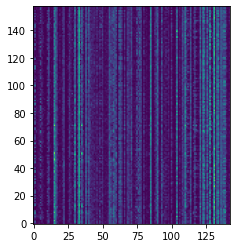

In [9]:
plt.imshow(firing_rate, origin='lower')

# 1

In [10]:
# first neuron
direction_mean = np.zeros(8)
for i in range(1,9):
    direction_mean[i-1] = firing_rate[(direction == i).flatten()][:,0].mean()

In [11]:
direction_mean

array([3.71823604, 2.33841363, 0.94966148, 0.74470821, 0.51546053,
       0.61088455, 4.36236034, 5.23958888])

Text(0, 0.5, 'firing rate mean')

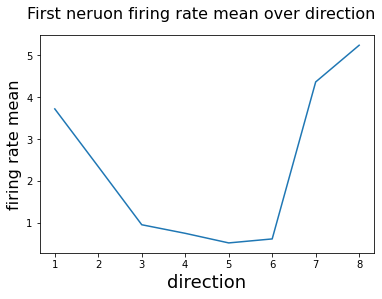

In [12]:
fig = plt.figure()
plt.plot(range(1,9), direction_mean)
fig.suptitle('First neruon firing rate mean over direction', fontsize=16)
plt.xlabel('direction', fontsize=18)
plt.ylabel('firing rate mean', fontsize=16)

# 2

In [13]:
# 2
neuron_1 = firing_rate[:,0]
neuron_2 = firing_rate[:,1]

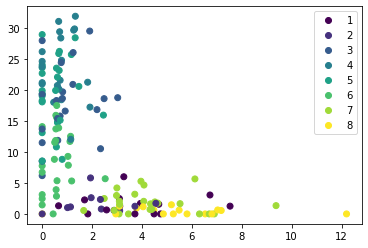

In [14]:
scatter = plt.scatter(neuron_1, neuron_2, c = direction)
classes = ['1','2','3','4','5','6','7','8']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)


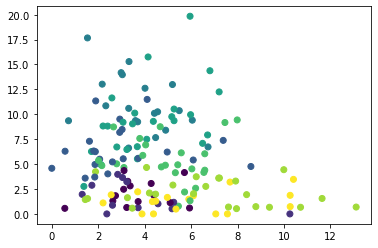

In [15]:
scatter = plt.scatter(firing_rate[:,36], firing_rate[:,10], c = direction)

# 3

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_norm = StandardScaler().fit_transform(firing_rate) #normlize

pca = PCA(n_components = 10)
data_pca = pca.fit_transform(data_norm)

data_pca.shape

(158, 10)

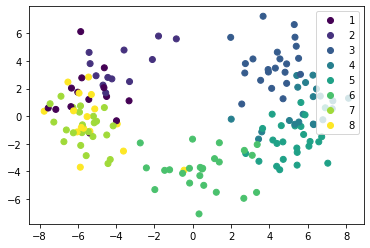

In [17]:
# scatter = plt.scatter(data_pca[:,0], data_pca[:,1])
scatter = plt.scatter(data_pca[:,0], data_pca[:,1], c = direction)
classes = ['1','2','3','4','5','6','7','8']
plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc='upper right')


In [18]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca

array([0.17104218, 0.05861031, 0.05056524, 0.04312119, 0.02938648,
       0.02432994, 0.02184124, 0.01965676, 0.01905571, 0.01839738])

In [19]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
cum_sum_eigenvalues

array([0.17104218, 0.2296525 , 0.28021774, 0.32333893, 0.35272541,
       0.37705535, 0.39889659, 0.41855335, 0.43760906, 0.45600644])

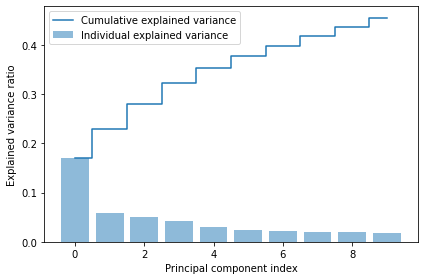

In [20]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

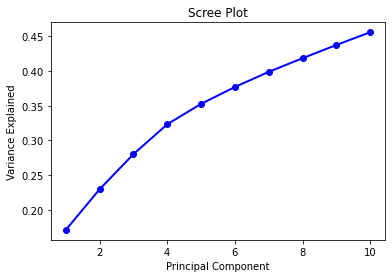

In [21]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, cum_sum_eigenvalues, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# 4

In [22]:
direction_mean = np.zeros((143, 8))
for j in range(143):
    for i in range(1,9):
        direction_mean[j][i-1] = firing_rate[(direction == i).flatten()][:,j].mean()


In [23]:
direction_mean.T.shape

(8, 143)

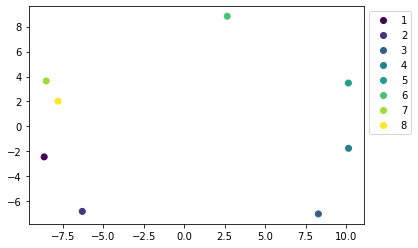

In [24]:
dir_based = StandardScaler().fit_transform(direction_mean.T)
pca_d = PCA(n_components = 2)
dir_pca = pca_d.fit_transform(dir_based)


scatter = plt.scatter(dir_pca[:,0], dir_pca[:,1], c = [1,2,3,4,5,6,7,8])
classes = ['1','2','3','4','5','6','7','8']
plt.legend(handles=scatter.legend_elements()[0], labels=classes, bbox_to_anchor =(1, 1))


In [25]:

exp_var_pca_d = pca_d.explained_variance_ratio_
cum_sum_eigenvalues_d = np.cumsum(exp_var_pca_d)


# direction 1 pca


In [26]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    temp_d = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))/np.pi*180
    if temp_d > 90:
        temp_d = 180 - temp_d
    return temp_d

# cluster 

In [27]:
dirs = {}
pca = PCA(n_components = 2)

In [28]:
pca = {}

In [29]:
for i in range(1,9):
    dn = StandardScaler().fit_transform(firing_rate[(direction == i).flatten()])
    pca[i] = PCA(n_components = 2)
    dirs[i] = pca[i].fit_transform(dn)


In [30]:
for i in range(1,7):
    print(min(angle_between(pca[i].components_[1], direction_mean.T[i-1]-direction_mean.T[i]), angle_between(pca[i].components_[0], direction_mean.T[i-1]-direction_mean.T[i])))
    print(min(angle_between(pca[i+1].components_[1], direction_mean.T[i]-direction_mean.T[i-1]), angle_between(pca[i+1].components_[0], direction_mean.T[i]-direction_mean.T[i-1])))

82.87186985409313
79.80395262732472
74.57712809714097
72.97172039294902
80.12186206488173
82.91496940845954
79.79045895638579
77.15904047196733
72.76161502534808
68.23347737433338
61.04547579293305
75.08827067891333


# LDA

/Users/a0/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


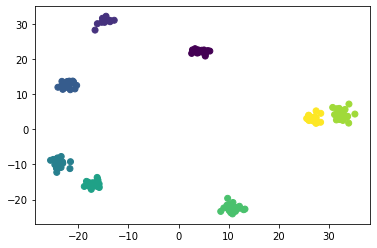

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(firing_rate,direction)
X_new = lda.transform(firing_rate)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=direction)
plt.show()

# 7 Turing neurons

In [32]:
def tuning_function(x, mu, kappa, fmax, bsl):
    # Von Mises, with kappa the concentration, mu the location
    # fmax the firing rate at pref ori, bsl the min firing rate (not the baseline, which was substracted) 
    tf = bsl + np.exp(kappa*(np.cos(x-mu)-1)) * (fmax-bsl)
    return tf

from lmfit import Model, Parameters

def fit_tc(array, init_kappa):
    x = np.linspace(0, 2*np.pi, len(array), endpoint=False)
    mod = Model(tuning_function)
    pars = Parameters()
    #               name    default           vary  min   max
    pars.add_many(('mu', x[np.argmax(array)], True, 0., 2*np.pi),
                  ('kappa', init_kappa, True,  .1, 10.),
                  ('fmax', np.max(array), True, 0.0, 2*np.max(array)+5),
                  ('bsl', np.min(array), True, 0.0, np.max(array)+5))
    out = mod.fit(array, pars, x=x, nan_policy='omit', max_nfev=50000)

    return out.best_values


In [33]:
theta = np.linspace(0, 2*np.pi, 8, endpoint=False)
theta_more = np.linspace(0,2*np.pi, 60, endpoint = False)

In [34]:
out = fit_tc(direction_mean[0], 3.5)
out

{'mu': 5.555490314170454,
 'kappa': 1.159237074402691,
 'fmax': 5.402392952036945,
 'bsl': 1.9335763142084718e-09}

In [35]:
p = tuning_function(theta_more, out['mu'], out['kappa'], out['fmax'], out['bsl'])

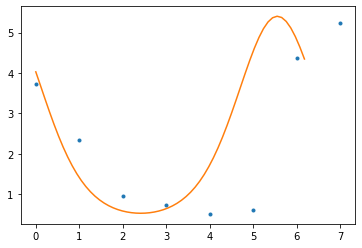

In [36]:
plt.plot(direction_mean[0], '.')
plt.plot(theta_more, p)

In [37]:
x = np.linspace(0, 2*np.pi, 8)
x

array([0.        , 0.8975979 , 1.7951958 , 2.6927937 , 3.5903916 ,
       4.48798951, 5.38558741, 6.28318531])

In [38]:
p

array([4.02779197, 3.69831747, 3.36688772, 3.04219545, 2.7312544 ,
       2.43930879, 2.16989586, 1.92502055, 1.70539889, 1.51073088,
       1.33997128, 1.19157627, 1.06371347, 0.9544299 , 0.86177879,
       0.78390935, 0.71912568, 0.66592157, 0.6229977 , 0.58926673,
       0.56385101, 0.5460766 , 0.53546604, 0.53173204, 0.5347731 ,
       0.5446719 , 0.56169662, 0.58630503, 0.61915071, 0.6610902 ,
       0.71318924, 0.77672561, 0.85318493, 0.94424501, 1.05174307,
       1.17761962, 1.32383214, 1.49223232, 1.68440234, 1.9014491 ,
       2.14376079, 2.41073773, 2.70051847, 3.00973166, 3.33331234,
       3.66442609, 3.99454222, 4.31368798, 4.61089641, 4.87483469,
       5.09456899, 5.26039368, 5.36463132, 5.40230355, 5.3715826 ,
       5.27396011, 5.11410926, 4.89945973, 4.63954546, 4.34521324])

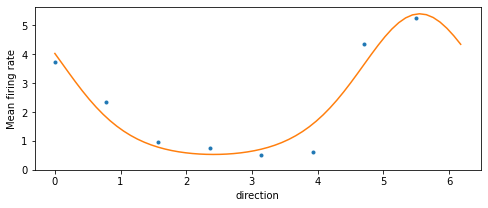

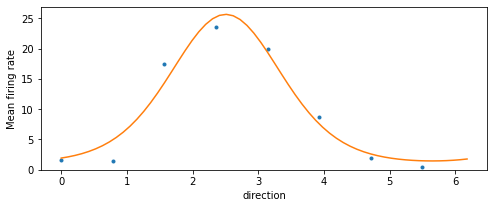

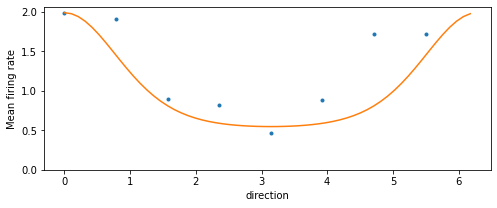

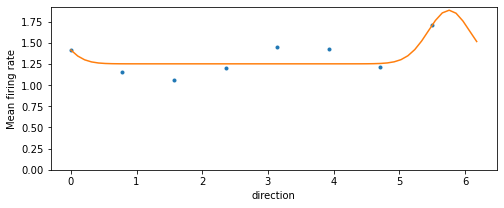

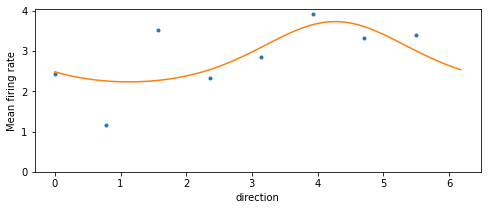

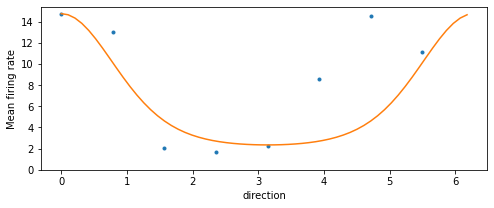

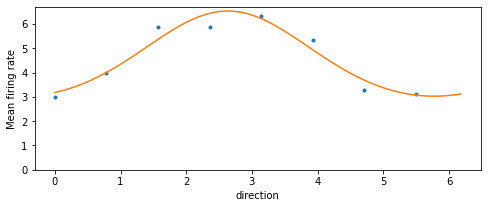

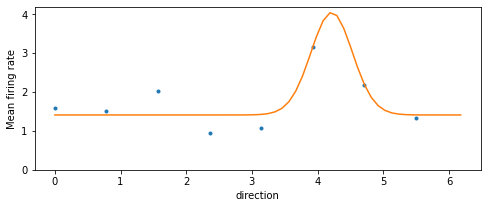

In [39]:
for i_neuron in range(8):
    p = fit_tc(direction_mean[i_neuron, :], 1.5)

    fig, ax = plt.subplots(figsize=(8, 3))
    ax.plot(theta, direction_mean[i_neuron, :] , '.')
    ax.plot(theta_more, tuning_function(theta_more, **p))
    ax.set_xlabel('direction')
    ax.set_ylabel('Mean firing rate')
    ax.set_ylim(0)
    plt.show()

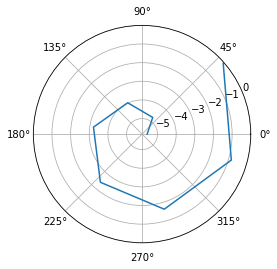

In [40]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot( theta - out['mu'])

In [41]:
mu_list = np.empty(143)
kappa_list = np.empty(143)
for i in range(143):
    out = fit_tc(direction_mean[i], 1)
    mu_list[i] = out['mu']
    kappa_list[i] = out['kappa']

(array([16.,  4., 11., 25., 24., 15.,  6.,  8., 16., 18.]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <BarContainer object of 10 artists>)

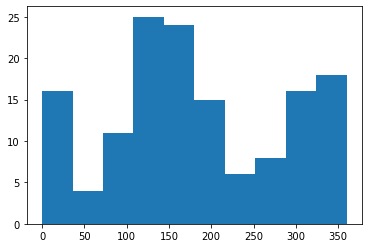

In [42]:
# distrubition of mu
plt.hist(mu_list*180/np.pi)


(array([72., 24.,  3.,  8.,  2.,  1.,  2.,  2.,  1., 28.]),
 array([ 0.1 ,  1.09,  2.08,  3.07,  4.06,  5.05,  6.04,  7.03,  8.02,
         9.01, 10.  ]),
 <BarContainer object of 10 artists>)

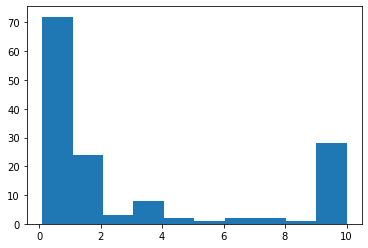

In [43]:
plt.hist(kappa_list)

# Decoding


In [44]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [45]:
data_x = torch.Tensor(firing_rate)
data_y = torch.Tensor(direction.flatten())
data_y = data_y.type(torch.LongTensor) - 1
m_dataset = TensorDataset(data_x, data_y)
m_dataloader = DataLoader(m_dataset)

In [46]:
data_x

tensor([[ 0.0000,  6.1823,  2.0608,  ...,  2.0608,  1.3738,  1.3738],
        [ 0.6813, 23.1644,  0.0000,  ...,  5.4505,  0.6813,  3.4065],
        [ 0.8014,  8.8158,  0.0000,  ...,  3.2057,  1.6029,  0.8014],
        ...,
        [ 3.4584,  0.0000,  2.0750,  ...,  2.0750,  0.0000,  4.1500],
        [ 3.7180,  0.0000,  3.0983,  ...,  3.0983,  1.8590,  1.2393],
        [ 5.8053,  0.0000,  1.6586,  ...,  1.6586,  0.0000,  3.3173]])

In [47]:
data_y

tensor([2, 4, 4, 1, 5, 2, 6, 3, 2, 3, 1, 0, 7, 4, 3, 1, 3, 6, 4, 1, 4, 0, 4, 3,
        2, 5, 7, 0, 0, 2, 4, 6, 3, 0, 2, 6, 7, 4, 4, 1, 2, 6, 0, 7, 4, 2, 6, 3,
        1, 4, 7, 7, 4, 6, 6, 3, 1, 5, 3, 5, 5, 4, 3, 2, 4, 5, 6, 7, 2, 3, 0, 7,
        4, 2, 2, 0, 4, 5, 5, 2, 6, 2, 0, 5, 7, 6, 2, 3, 0, 4, 6, 5, 2, 7, 6, 5,
        2, 5, 7, 5, 3, 5, 2, 1, 5, 0, 6, 5, 7, 5, 5, 6, 3, 3, 3, 6, 1, 1, 7, 3,
        2, 7, 0, 6, 6, 6, 5, 3, 6, 4, 4, 7, 5, 4, 6, 2, 5, 4, 5, 2, 2, 6, 3, 3,
        4, 5, 7, 0, 5, 1, 4, 6, 4, 1, 4, 6, 0, 7])

In [48]:
from torch.utils.data import random_split
def get_splits(X, n_test=0.33):
    # determine sizes
    test_size = round(n_test * len(X))
    train_size = len(X) - test_size
    # calculate the split
    return random_split(X, [train_size, test_size])

In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from numpy import vstack
from numpy import argmax
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from torch import Tensor

from torch.nn import Module
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 60)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(60, 20)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(20, 8)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Softmax(dim=1)
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # output layer
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(dataset):
    # calculate split
    train, test = get_splits(dataset)
    # prepare data loaders
    train_dl = DataLoader(train)
    test_dl = DataLoader(test)
    return train_dl, test_dl
 
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(500):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
 
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc
 
# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat
 

train_dl, test_dl = prepare_data(m_dataset)
print(len(train_dl.dataset), len(test_dl.dataset))


106 52


In [83]:
model = MLP(143)

In [94]:
train_dl, test_dl = prepare_data(m_dataset)

In [95]:
train_model(train_dl, model)

In [97]:
acc = evaluate_model(test_dl, model)

In [98]:
print('Accuracy: %.3f' % acc)


Accuracy: 0.135


In [99]:
# make a single prediction
row = firing_rate[1,:]
yhat = predict(row, model)
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[1.0240036e-37 6.6701807e-43 9.8755848e-38 1.0000000e+00 5.8529103e-19
  0.0000000e+00 2.3818789e-37 9.5400330e-15]] (class=3)


In [100]:
direction[1]-1

array([4], dtype=uint8)

# Poisson


In [57]:
from sklearn import preprocessing
from sklearn import linear_model
clf = linear_model.PoissonRegressor()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
 X_train, X_test, y_train, y_test = train_test_split(firing_rate, direction.flatten(), test_size=0.33, random_state=42)

In [60]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [61]:
clf.fit(X_scaled, y_train)

PoissonRegressor()

In [62]:
clf.score(X_scaled, y_train)

0.9086892796922043

In [63]:
clf.intercept_

1.4814081930726344

In [64]:
scaler_test = preprocessing.StandardScaler().fit(X_test)
Xt_scaled = scaler_test.transform(X_test)

In [65]:
predict = clf.predict(Xt_scaled)
predict

array([ 7.34019229,  2.66426322,  9.55715973,  3.39795088,  3.85171333,
        2.41979121,  2.75532941,  5.84105744,  9.16122558,  2.78519045,
        3.04987265,  3.20171011,  2.78083729,  4.18217082,  2.80507344,
        3.87464973,  4.45908852,  5.88305187,  4.51943236, 10.48823948,
        3.66381524,  4.79959229, 10.20594036,  3.16711949,  4.78581414,
        4.28382786,  6.49637474,  2.36405287,  5.34256106,  6.09197581,
        5.88038354,  2.42456257,  4.96354382,  4.58531371,  7.05122958,
        4.83651241,  5.12653823,  2.57333126,  2.67339272,  3.3578706 ,
        7.1221988 ,  7.25157737,  5.02419884,  3.36903795,  2.40193005,
        4.25862959,  4.75974686,  6.19787965,  7.06981444,  3.26040341,
        2.87875539,  3.28120887,  7.66948442])

In [66]:
y_test

array([7, 3, 7, 1, 7, 3, 3, 8, 6, 3, 2, 2, 2, 4, 3, 5, 1, 6, 8, 6, 5, 5,
       8, 4, 7, 3, 8, 3, 7, 8, 6, 1, 5, 4, 6, 8, 5, 1, 8, 2, 8, 6, 6, 2,
       8, 5, 5, 5, 7, 1, 3, 3, 7], dtype=uint8)

In [67]:
np.round_(predict)

array([ 7.,  3., 10.,  3.,  4.,  2.,  3.,  6.,  9.,  3.,  3.,  3.,  3.,
        4.,  3.,  4.,  4.,  6.,  5., 10.,  4.,  5., 10.,  3.,  5.,  4.,
        6.,  2.,  5.,  6.,  6.,  2.,  5.,  5.,  7.,  5.,  5.,  3.,  3.,
        3.,  7.,  7.,  5.,  3.,  2.,  4.,  5.,  6.,  7.,  3.,  3.,  3.,
        8.])

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [69]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [70]:
pipe.score(X_test, y_test) 

0.660377358490566